In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()                                                                        # class가 타깃값으로 0이면 레드 와인, 1이면 화이트 와인. 

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.shape

(6497, 4)

In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


# 전처리 - 하지만, 트리 알고리즘에서는 표준화 전처리 과정이 필요가 없다.

sugar의 최솟값과 최댓값은 5.443, 65.8이고, pH의 최솟값과 최댓값은 2.72, 4.01으로 범위의 차이가 심하다. 즉, 전처리가 필요한 데이터이다.

In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [8]:
print(data[:5]); print()
print(target[:5])

[[9.4  1.9  3.51]
 [9.8  2.6  3.2 ]
 [9.8  2.3  3.26]
 [9.8  1.9  3.16]
 [9.4  1.9  3.51]]

[0. 0. 0. 0. 0.]


In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42                                   # test_size : 샘플의 개수를 정함.
)

In [11]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
print(train_scaled[:5]); print()
print(test_scaled[:5])

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]]

[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 [-0.82568214  1.19436794 -0.60744601]
 [-1.32935087  1.75732283 -0.67009777]]


In [15]:
from sklearn.linear_model import LogisticRegression                                # 이진 분류

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)); print()
print(lr.score(test_scaled, test_target))

0.7808350971714451

0.7776923076923077


In [16]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 결정 트리(Decision Tree) -  DecisionTreeClassifier

질문을 하나씩 던져 정답을 맞춰감. 간단하게 설명하자면 **스무고개**와 같은 방식.

데이터를 잘 나눌 수 있는 질문을 찾는다면 **계속 질문을 추가해서 분류 정확도를 높일 수 있다.**

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))                                         # 과대적합(결정 트리의 특성, 대부분 과대적합으로 나온다.)

0.996921300750433
0.8569230769230769


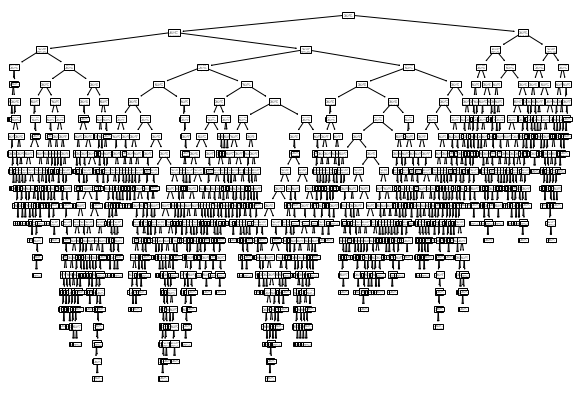

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

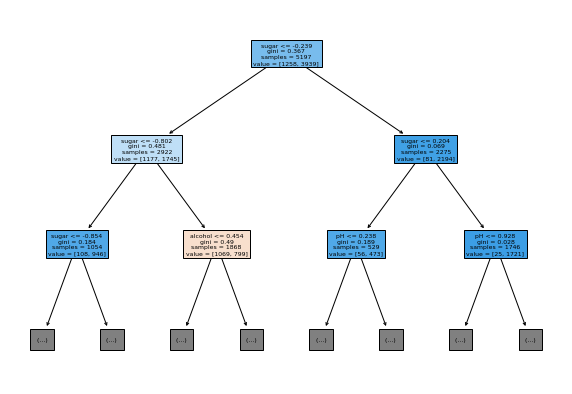

In [26]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

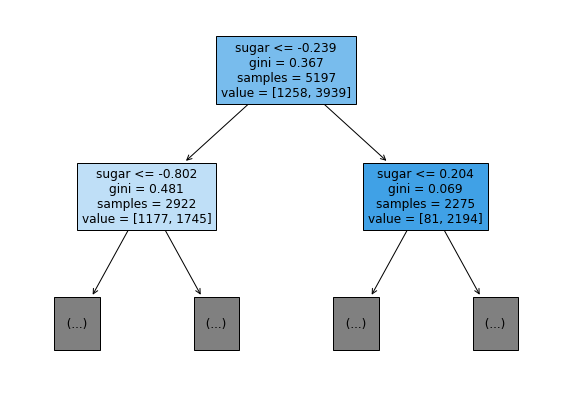

In [25]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()                                                                        # max_depth=1 : 트리의 깊이를 제한. 루트 노드를 제외하고 하나의 노드를 확장하여 그린다. 디폴트 값은 None.
                                                                                  # filled=True : 클래스에 맞게 노드의 색을 칠한다. 디폴트 값은 None.
                                                                                  # feature_names=[] : 특성의 이름을 전달할 수 있다. 디폴트 값은 None.

위의 트리에서
- sugar, alcohol, pH : 테스트 조건
- gini : 불순도
- samples : 총 샘플의 수
- value : 클래스별 샘플 수

- 화살표의 방향이 왼쪽 : Yes
- 화살표의 방향이 오른쪽 : No

## 지니 불순도(gini impurity)

$지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)$

DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'이다.

criterion 매개변수의 용도는 **노드에서 데이터를 분할할 기준**을 정하는 것이다.

즉, criterion='gini'일 경우, 데이터의 분할 기준은 불순도(gini)가 되는 것이다.

### 부모 노드(parent node)와 자식 노드(child node)의 불순도 차이

트리 모델은 가능한 부모 노드와 자식 노드의 불순도 차이가 크도록 트리를 성장시킨다.

$부모의 불순도 - (왼쪽(자식) 노드 샘플 수 / 부모의 샘플 수) * 왼쪽(자식) 노드 불순도 - (오른쪽(자식) 노드 샘플 수 / 부모의 샘플 수) * 오른쪽(자식) 노드 불순도$

부모와 자신 노드 사이의 불순도 차이를 **정보 이득(information gini)**라 부른다.
이 알고리즘은 **정보 이득이 최대**가 되도록 데이터를 나눈다.(불순도 기준)

### 엔트로피 불순도(entropy gini)

지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용.

$-음성 클래스의 비율 * log_2(음성 클래스 비율) - 양성 클래스 비율 * log_2(양성 클래스 비율)$

지니 불순도와 엔트로피 불순도의 결과는 큰 차이가 없다.

## 가지치기

객체화를 할 때, max_depth를 미리 정해줘 score 점수를 안정화시킨다.

In [28]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


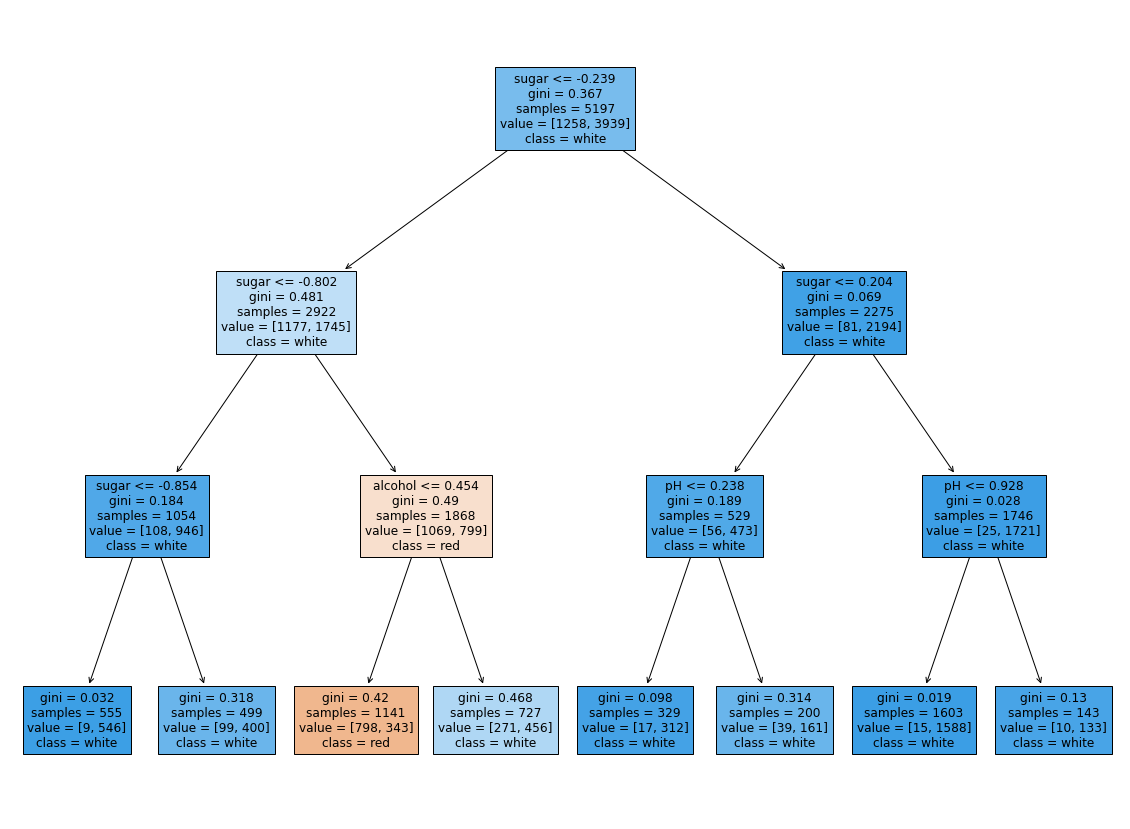

In [35]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'], class_names=['red','white'])
plt.show()

In [30]:
print(dt.feature_importances_)                                                     # 특성이 가진 영향력의 크기 (알코올, 당도, pH 순서)

[0.12345626 0.86862934 0.0079144 ]


# 전처리가 필요 없는 트리 알고리즘

불순도는 클래스별 비율을 가지고 계산을 한다. 그렇기 때문에 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일 계산에 영향을 미치지 않는다.(하나의 특성만을 가지고 나누기 때문이다.)

따라서, 특**성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미지치 않는다.**(**전처리가 필요없다.**)

In [36]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))                                           # 스케일을 조절하지 않아도 같은 값이 나온다.

0.8454877814123533
0.8415384615384616


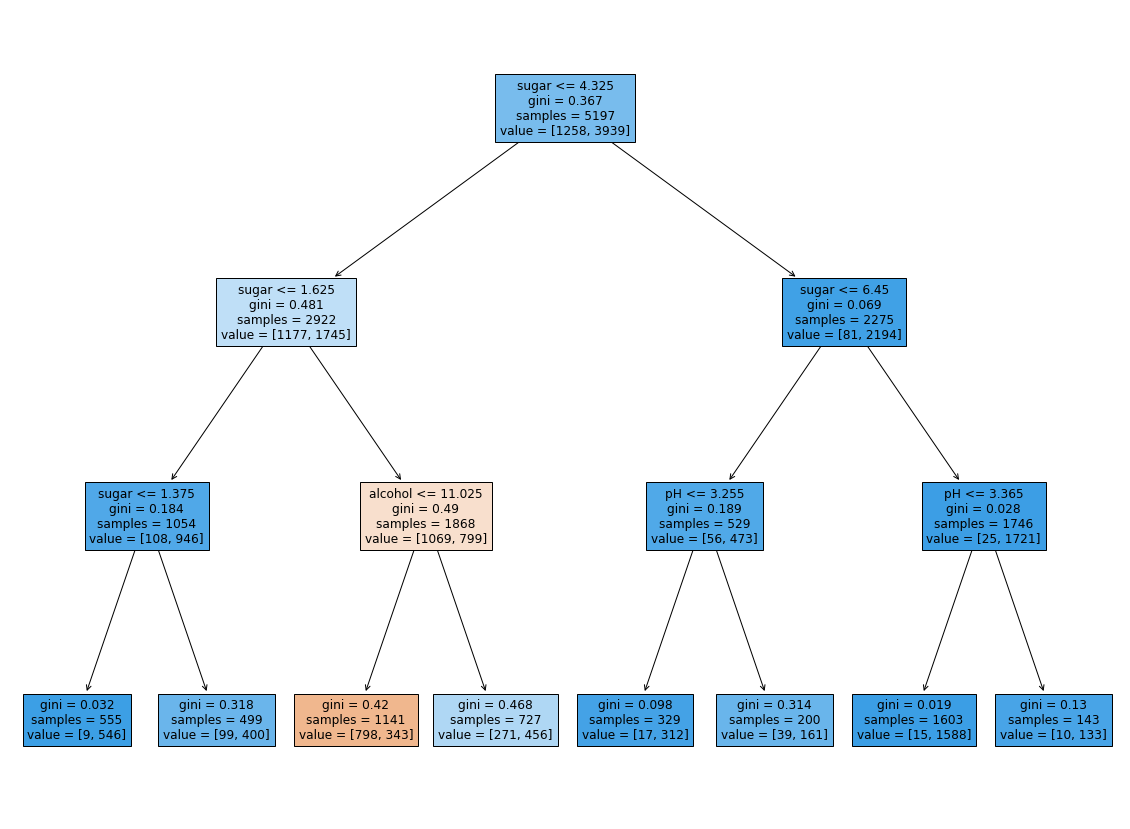

In [37]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [38]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


# 문제 3번 241p

In [39]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


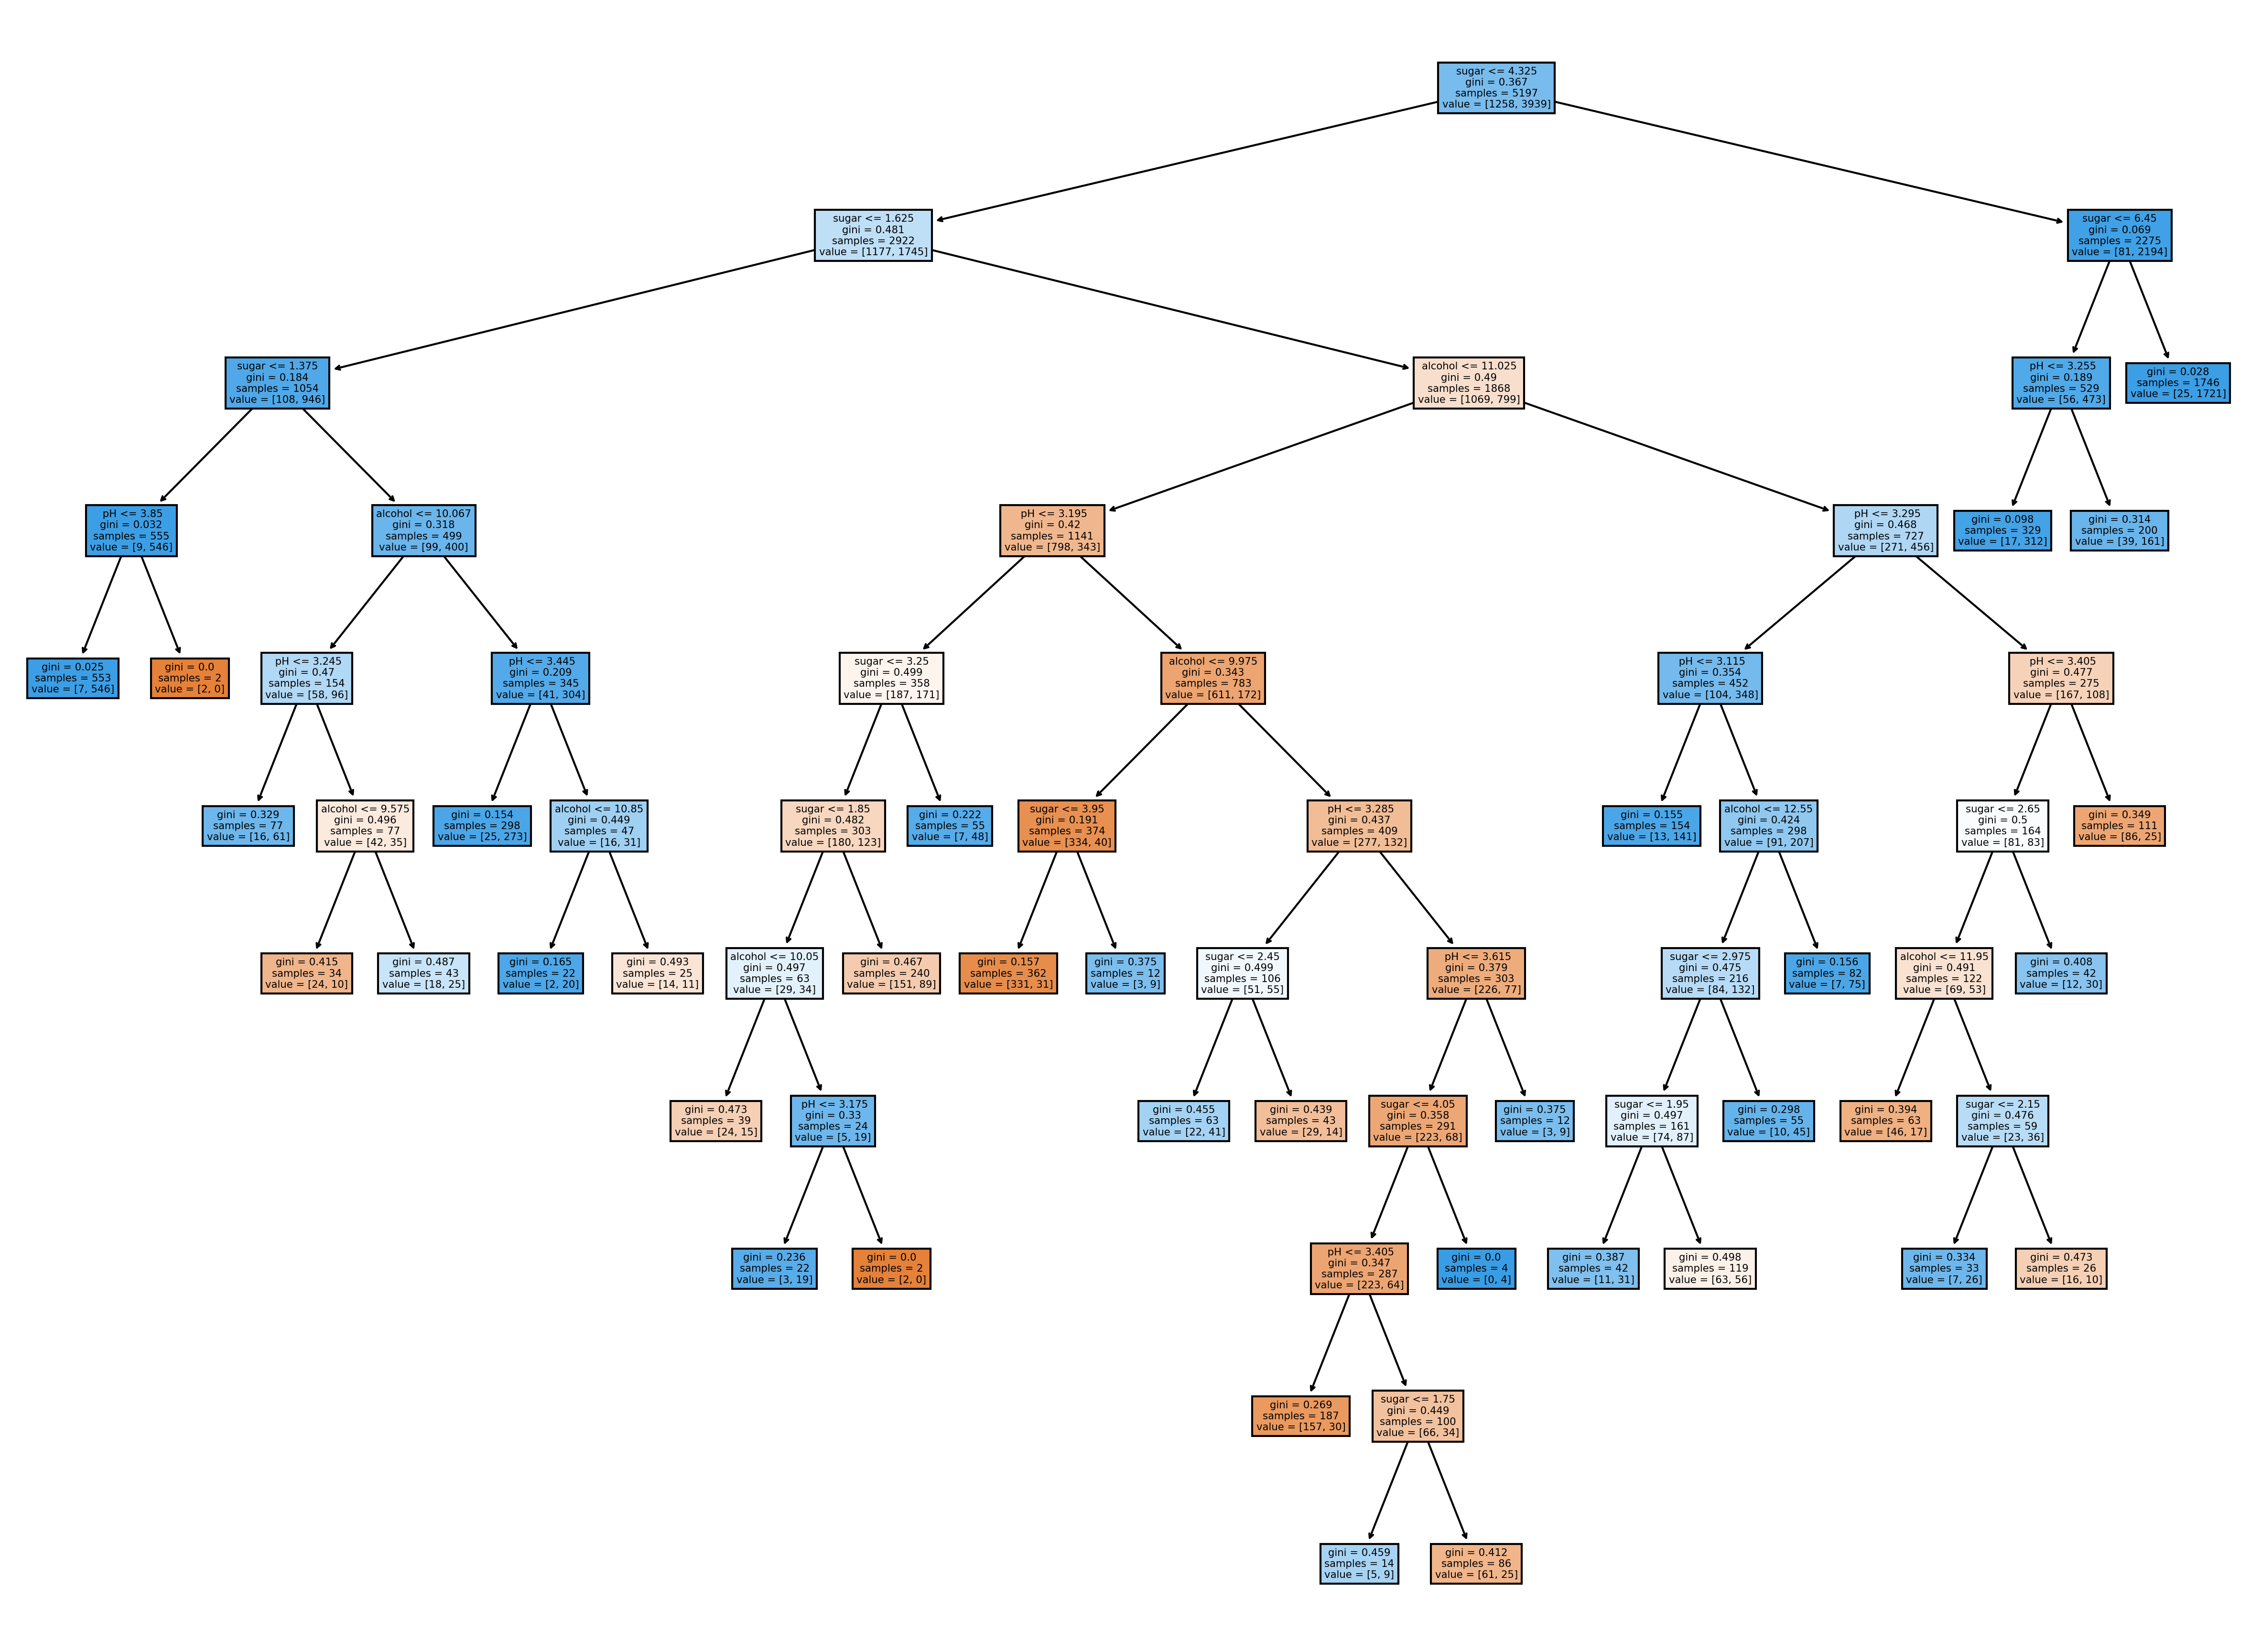

In [40]:
plt.figure(figsize=(20,15), dpi=300)                                               # dpi : 수치해상도
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', ' pH'])
plt.show()